### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Exploratory data analysis

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  
            textID                                  text selected_text  \
count        27481                                 27480         27480   
unique       27481                                 27480         22463   
top     cb774db0d1   I`d have responded, if I were going       

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


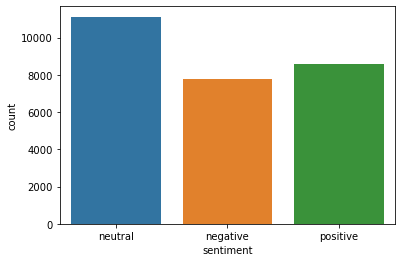

In [3]:
# Load the dataset
data = pd.read_csv('dataset_analysis.csv')

# Display basic statistics
print(data.head())
print(data.describe())

# Visualize sentiment distribution
sns.countplot(data['sentiment'])
plt.show()

### Wordcloud plotting 

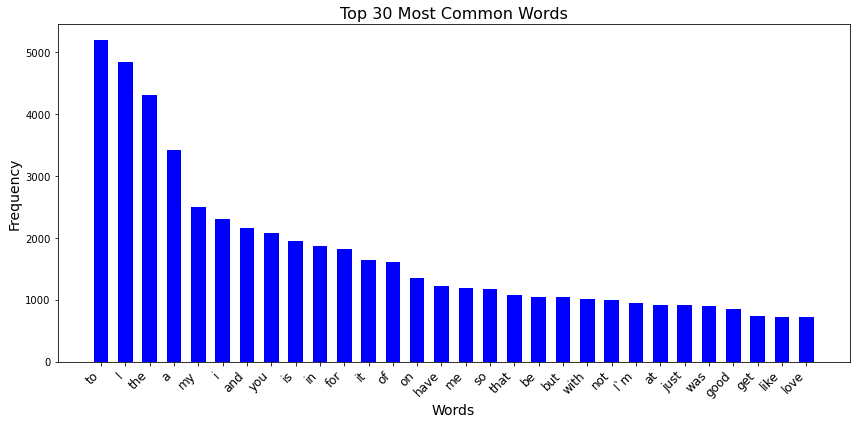

In [4]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the text into words
words = ' '.join(data['selected_text'].fillna('').astype(str)).split()

# Count word frequencies
word_freq = Counter(words)

# Get the N most common words and their counts
top_n_words = word_freq.most_common(30)  

# Extract words and counts for plotting
words, counts = zip(*top_n_words)

# Create a bar plot with increased bar width
bar_width = 0.6
plt.figure(figsize=(12, 6))
plt.bar(words, counts, width=bar_width, color='blue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 30 Most Common Words', fontsize=16)
plt.tight_layout()
plt.show()


### Cleaning the data

In [15]:
# Removing punctuation and converting to lowercase
data['cleaned_text'] = data['text'].str.replace('[^\w\s]', '').str.lower()

# Removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print("Data has been cleaned successfully!!!")

C:\Users\admin\AppData\Local\Temp/ipykernel_11760/1185445754.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['cleaned_text'] = data['text'].str.replace('[^\w\s]', '').str.lower()
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data has been cleaned successfully!!!


In [18]:
# Tokenization using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)

print("Train-test split done")

Train-test split done


### Training SVM, KNN and Naive Bayes model

In [19]:
# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [20]:
# Train a K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [21]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

### Assessing All Classifier Performance

In [22]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.6221575404766236
              precision    recall  f1-score   support

    negative       0.80      0.39      0.52      1562
     neutral       0.54      0.83      0.65      2230
    positive       0.75      0.57      0.65      1705

    accuracy                           0.62      5497
   macro avg       0.69      0.59      0.61      5497
weighted avg       0.68      0.62      0.61      5497



In [23]:
# Predict using the SVM classifier
svm_y_pred = svm_classifier.predict(X_test)

# Evaluate SVM performance
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
print(f'SVM Accuracy: {svm_accuracy}')
print(svm_report)


SVM Accuracy: 0.6981990176459887
              precision    recall  f1-score   support

    negative       0.75      0.58      0.65      1562
     neutral       0.63      0.78      0.70      2230
    positive       0.78      0.70      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.72      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



In [24]:
# Predict using the KNN classifier
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate KNN performance
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)
print(f'KNN Accuracy: {knn_accuracy}')
print(knn_report)


KNN Accuracy: 0.4455157358559214
              precision    recall  f1-score   support

    negative       0.71      0.06      0.11      1562
     neutral       0.42      0.98      0.59      2230
    positive       0.84      0.10      0.19      1705

    accuracy                           0.45      5497
   macro avg       0.66      0.38      0.30      5497
weighted avg       0.63      0.45      0.33      5497

